In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import random_projection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.linear_model import LogisticRegression

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist
from pyts.metrics import dtw as dtw2

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#features = list()
with open('../features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


# Loading Training Sets

In [4]:
X_train = pd.read_csv('X_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_train.columns = features

# add subject column to the dataframe
#X_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train = X_train
#train['Activity'] = y_train

In [5]:
body_acc_x_train = pd.read_csv('Inertial Signals/body_acc_x_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [6]:
body_acc_y_train = pd.read_csv('Inertial Signals/body_acc_y_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_y_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [7]:
body_acc_z_train = pd.read_csv('Inertial Signals/body_acc_z_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_z_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [8]:
body_gyro_x_train = pd.read_csv('Inertial Signals/body_gyro_x_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)
#y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
#y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train = body_gyro_x_train
#train['Activity'] = y_train
#train['ActivityName'] = y_train_labels

In [9]:
body_gyro_y_train = pd.read_csv('Inertial Signals/body_gyro_y_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_y_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [10]:
body_gyro_z_train = pd.read_csv('Inertial Signals/body_gyro_z_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_z_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [11]:
total_acc_x_train = pd.read_csv('Inertial Signals/total_acc_x_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [12]:
total_acc_y_train = pd.read_csv('Inertial Signals/total_acc_y_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_y_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [13]:
total_acc_z_train = pd.read_csv('Inertial Signals/total_acc_z_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_z_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

# Loading Test Sets

In [14]:
X_test = pd.read_csv('../test/X_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
X_test.columns = features

# add subject column to the dataframe
#X_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

y_test = pd.read_csv('../test/y_test.txt', names=['Activity'], squeeze=True)
#y_test_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train01 = X_test
#train01['Activity'] = y_test

In [15]:
body_acc_x_test = pd.read_csv('../test/Inertial Signals/body_acc_x_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_x_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [16]:
body_acc_y_test = pd.read_csv('../test/Inertial Signals/body_acc_y_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_y_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [17]:
body_acc_z_test = pd.read_csv('../test/Inertial Signals/body_acc_z_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_acc_z_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [18]:
body_gyro_x_test = pd.read_csv('../test/Inertial Signals/body_gyro_x_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_x_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [19]:
body_gyro_y_test = pd.read_csv('../test/Inertial Signals/body_gyro_y_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_y_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [20]:
body_gyro_z_test = pd.read_csv('../test/Inertial Signals/body_gyro_z_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_z_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [21]:
total_acc_x_test = pd.read_csv('../test/Inertial Signals/total_acc_x_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_x_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [22]:
total_acc_y_test = pd.read_csv('../test/Inertial Signals/total_acc_y_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_y_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [23]:
total_acc_z_test = pd.read_csv('../test/Inertial Signals/total_acc_z_test.txt', delim_whitespace=True, header=None, encoding='latin-1')
#total_acc_z_test['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)

In [24]:
#dataset con varianza più alta
body_acc_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,-0.003374,-0.002858,-0.001708,-0.000536,0.000333,0.000480,-0.000289,-0.001002,-0.000909,-0.000574,...,-0.000798,0.000131,0.000343,0.000431,0.000650,0.000752,0.001230,0.000948,0.000916,0.001978
std,0.198317,0.197407,0.197976,0.196811,0.195771,0.196652,0.195381,0.194239,0.193354,0.196055,...,0.191265,0.191452,0.191714,0.193405,0.194176,0.194513,0.195691,0.196523,0.197047,0.199408
min,-0.857863,-0.897771,-0.975056,-0.984342,-0.886248,-0.830093,-0.835363,-0.879751,-0.955099,-1.027935,...,-1.038524,-0.756240,-1.019879,-0.828062,-0.864435,-0.746925,-0.897870,-0.865697,-0.750321,-0.795426
25%,-0.038449,-0.037463,-0.036089,-0.033924,-0.033026,-0.035838,-0.034997,-0.032398,-0.034113,-0.033094,...,-0.022469,-0.023967,-0.022285,-0.021040,-0.023009,-0.023871,-0.024126,-0.022968,-0.024064,-0.023289
50%,-0.000718,-0.000747,-0.000624,-0.000658,-0.000719,-0.000827,-0.000762,-0.000831,-0.000746,-0.000697,...,-0.000596,-0.000646,-0.000608,-0.000477,-0.000545,-0.000575,-0.000617,-0.000460,-0.000694,-0.000622
75%,0.008661,0.008745,0.008930,0.008600,0.008426,0.008191,0.008751,0.008574,0.008221,0.008555,...,0.006514,0.006619,0.006823,0.006992,0.006615,0.006518,0.006584,0.007144,0.006665,0.006828
max,1.133144,1.091050,1.097443,1.046354,1.107588,1.057651,1.238608,1.049933,1.101743,1.056121,...,1.127268,1.132387,1.156435,1.133764,1.089165,1.128485,1.082167,1.180790,1.155468,1.087837


In [25]:
std_baccx = body_acc_x_train.std()
std_baccy = body_acc_y_train.std()
std_baccz = body_acc_z_train.std()
std_bgyrox = body_gyro_x_train.std()
std_bgyroy = body_gyro_y_train.std()
std_bgyroz = body_gyro_z_train.std()
std_totaccx = total_acc_x_train.std()
std_totaccy = total_acc_y_train.std()
std_totaccz = total_acc_z_train.std()

In [26]:
print('bacc_x', std_baccx.mean())
print('bacc_y', std_baccy.mean())
print('bacc_z', std_baccz.mean())
print('bgyro_x', std_bgyrox.mean())
print('bgyro_y', std_bgyroy.mean())
print('bgyro_z', std_bgyroz.mean())
print('totacc_x', std_totaccx.mean())
print('totacc_y', std_totaccy.mean())
print('totacc_z', std_totaccz.mean())

bacc_x 0.19482892669749152
bacc_y 0.12240050717841242
bacc_z 0.10680715788956446
bgyro_x 0.4067296422795279
bgyro_y 0.38175873417057304
bgyro_z 0.25570864936282
totacc_x 0.41413047027078664
totacc_y 0.3910152844312498
totacc_z 0.35778355912457643


In [27]:
print('bgyro_x', std_bgyrox.var())
print('totacc_x', std_totaccx.var())
print('totacc_y', std_totaccy.var())

bgyro_x 7.779602430478292e-05
totacc_x 3.244924674966347e-06
totacc_y 1.9207174505528415e-06


In [29]:
for i in range(len(total_acc_x_train)):
    if body_gyro_x_train.iloc[i][127] > 4 or body_gyro_x_train.iloc[i][127] < -3.3:
        print(body_gyro_x_train.iloc[i][127])
        print('row:', i)
        print('----------------')

-3.395589
row: 3750
----------------
4.077152
row: 3915
----------------
-3.658334
row: 4871
----------------


# Data preparation

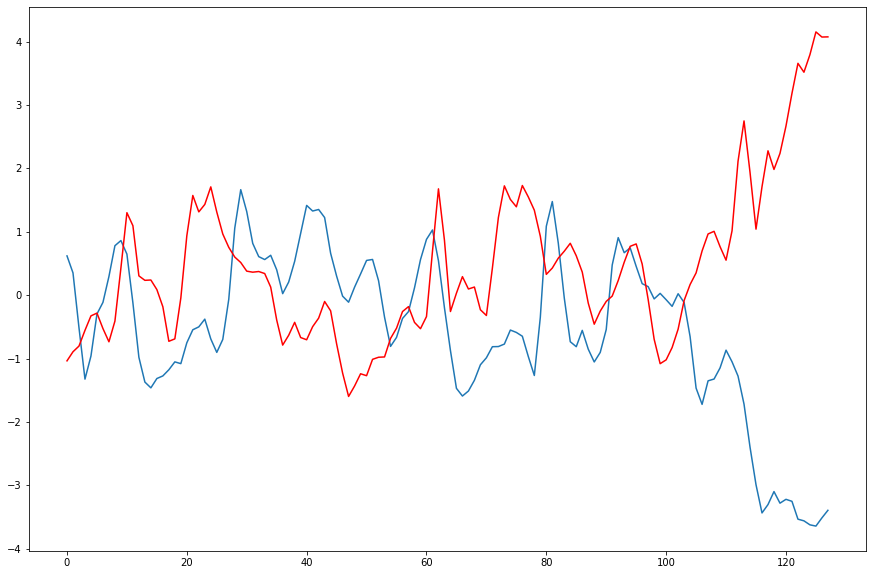

In [30]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[3750])
plt.plot(body_gyro_x_train.T[3915], color='red')
plt.show()

# Shapelets

In [25]:
#from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

In [26]:
n_ts, ts_sz = body_gyro_x_train.shape
n_classes = len(set(y_train))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 7352
ts_sz 128
n_classes 6
shapelet_sizes {12: 6}


In [27]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [28]:
shp_clf.fit(body_gyro_x_train, y_train)

2022-05-20 10:26:58.659151: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/200
29/29 [==============================] - 1s 10ms/step - loss: 1.9068 - categorical_accuracy: 0.1910 - categorical_crossentropy: 1.8341
Epoch 2/200
29/29 [==============================] - 0s 6ms/step - loss: 1.8867 - categorical_accuracy: 0.1950 - categorical_crossentropy: 1.8156
Epoch 3/200
29/29 [==============================] - 0s 9ms/step - loss: 1.8690 - categorical_accuracy: 0.2012 - categorical_crossentropy: 1.7994
Epoch 4/200
29/29 [==============================] - 0s 9ms/step - loss: 1.8533 - categorical_accuracy: 0.2059 - categorical_crossentropy: 1.7849
Epoch 5/200
29/29 [==============================] - 0s 8ms/step - loss: 1.8392 - categorical_accuracy: 0.2081 - categorical_crossentropy: 1.7720
Epoch 6/200
29/29 [==============================] - 0s 8ms/step - loss: 1.8266 - categorical_accuracy: 0.2096 - categorical_crossentropy: 1.7605
Epoch 7/200
29/29 [==============================] - 0s 9ms/step - loss: 1.8153 - categorical_accuracy: 0.2111 - categorica

LearningShapelets(max_iter=200, n_shapelets_per_size={12: 6}, verbose=1,
                  weight_regularizer=0.01)

In [11]:
from sklearn.metrics import accuracy_score

In [42]:
predicted_locations = shp_clf.locate(body_gyro_x_train)

29/29 [==============================] - 0s 5ms/step


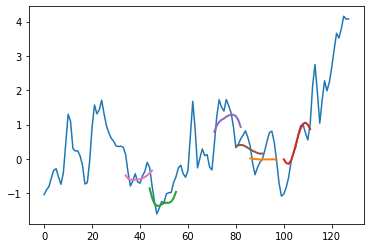

In [45]:
ts_id = 3915
plt.figure()
n_shapelets = sum(shapelet_sizes.values())

plt.plot(body_gyro_x_train.T[ts_id])
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

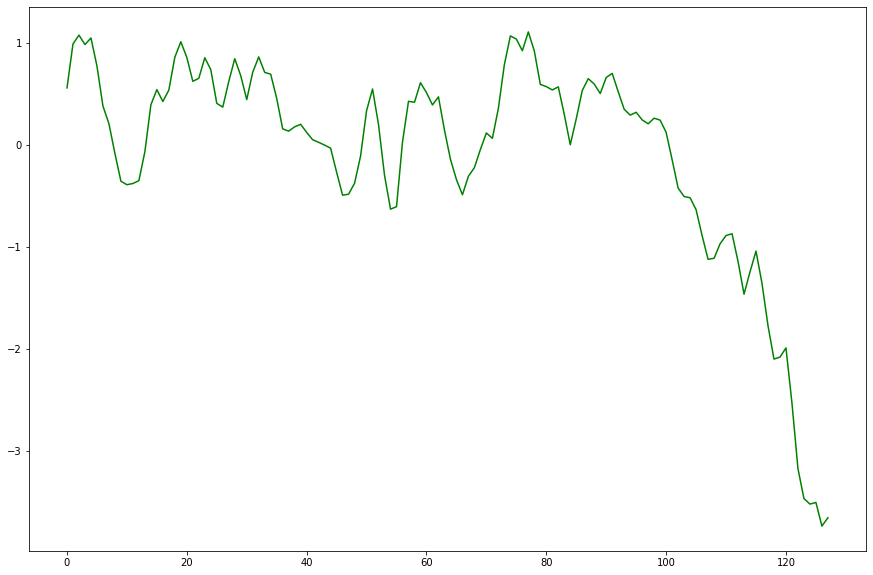

In [31]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[4871], color='green')
plt.show()

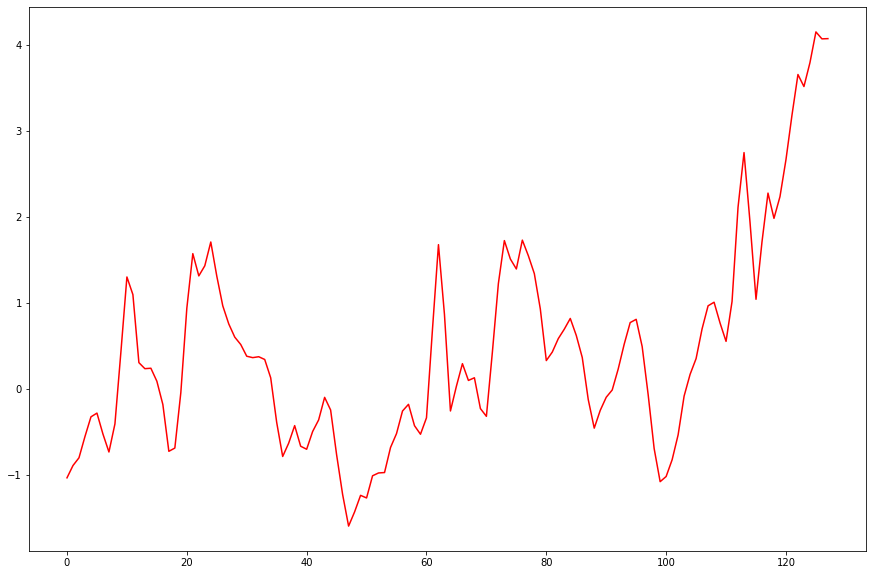

In [32]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[3915], color='red')
plt.show()

In [ ]:
w = 3
mp, mpi = matrixProfile.stomp(ts.values, w)

# Transformations

### Transformation I: Offset Translation

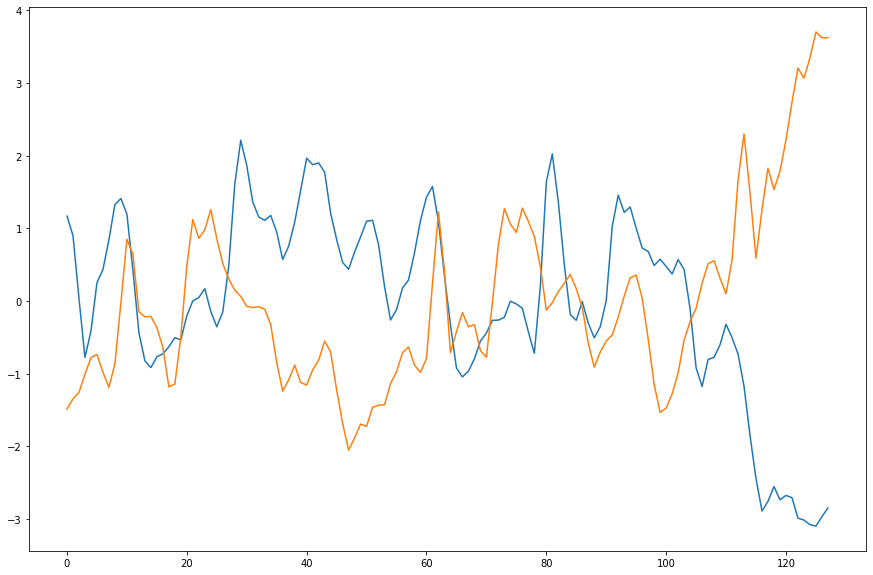

In [33]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[3750] - body_gyro_x_train.T[3750].mean())
plt.plot(body_gyro_x_train.T[3915] - body_gyro_x_train.T[3915].mean())
plt.show()

### Transformation II: Amplitude Scaling

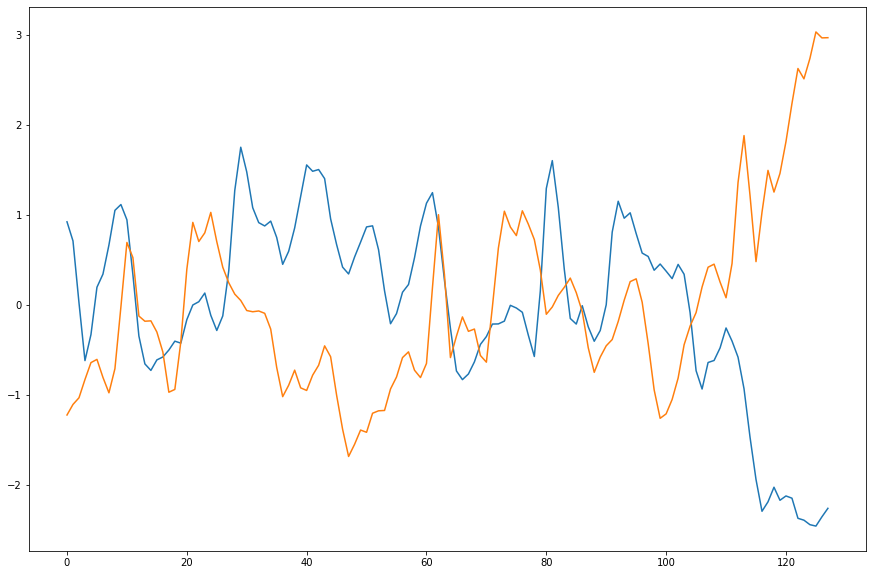

In [34]:
plt.figure(figsize=(15,10))
plt.plot((body_gyro_x_train.T[3750] - body_gyro_x_train.T[3750].mean())/body_gyro_x_train.T[3750].std())
plt.plot((body_gyro_x_train.T[3915] - body_gyro_x_train.T[3915].mean())/body_gyro_x_train.T[3915].std())
plt.show()

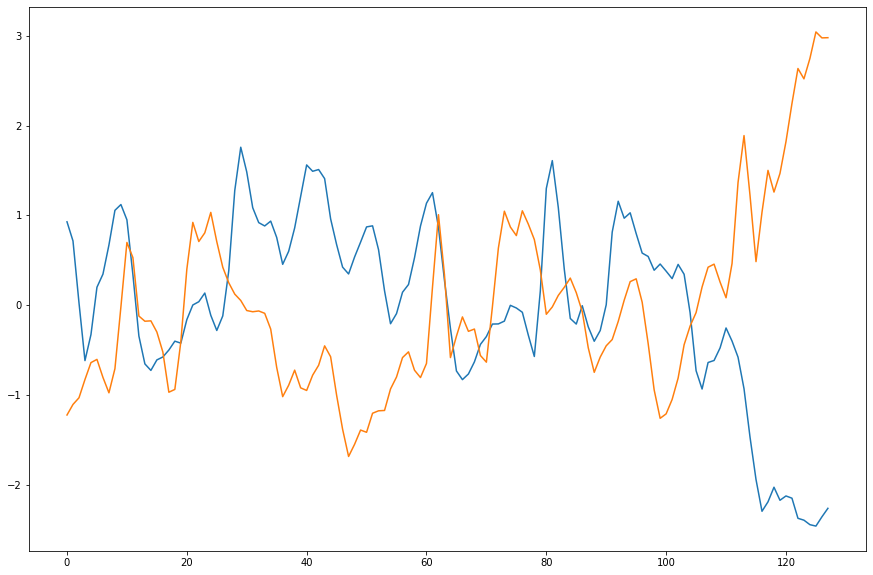

In [35]:
plt.figure(figsize=(15,10))
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts1_scaled = scaler.fit_transform(body_gyro_x_train.T[3750].values.reshape(1, -1)).flatten()
ts2_scaled = scaler.fit_transform(body_gyro_x_train.T[3915].values.reshape(1, -1)).flatten()

plt.plot(ts1_scaled)
plt.plot(ts2_scaled)
plt.show()

### Transformation IV: Noise (smoothing)

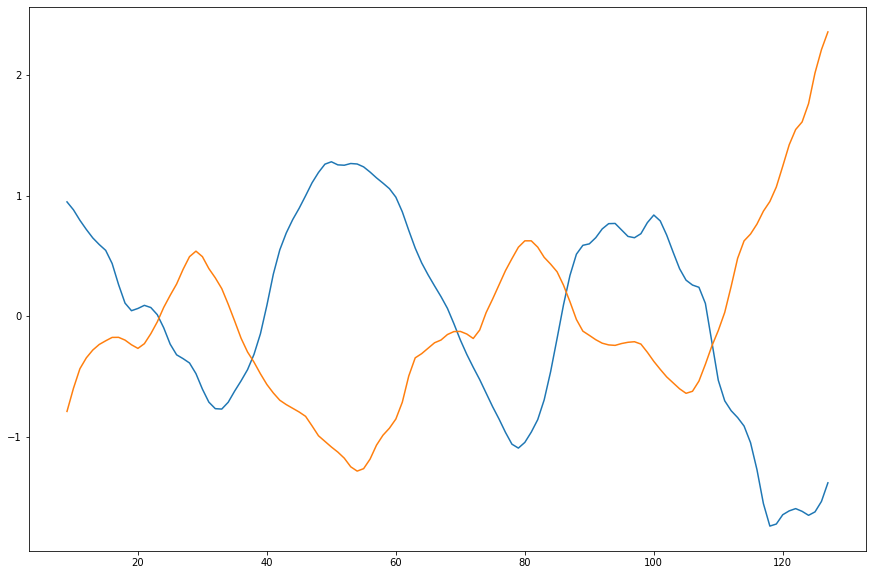

In [36]:
plt.figure(figsize=(15,10))
w = 10
plt.plot(((body_gyro_x_train.T[3759] - body_gyro_x_train.T[3759].mean())/body_gyro_x_train.T[3759].std()).rolling(window=w).mean())
plt.plot(((body_gyro_x_train.T[3915] - body_gyro_x_train.T[3915].mean())/body_gyro_x_train.T[3915].std()).rolling(window=w).mean())
plt.show()

### Transformation III: Trend removal

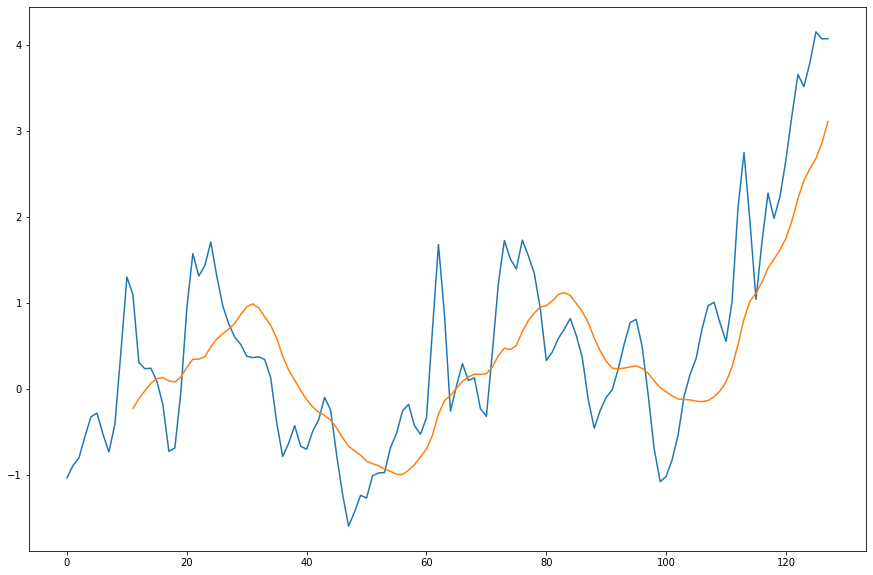

In [37]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[3915])
plt.plot(body_gyro_x_train.T[3915].rolling(window=12).mean())
plt.show()

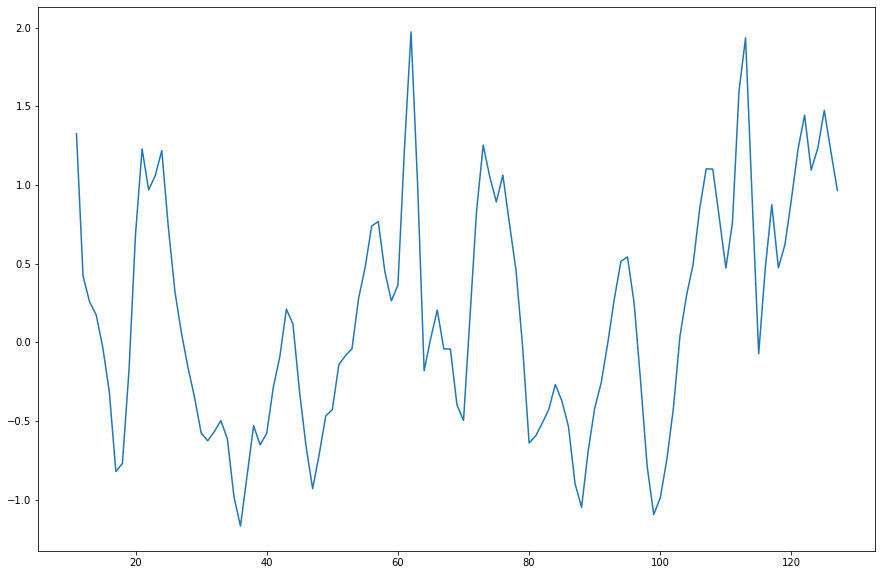

In [38]:
plt.figure(figsize=(15,10))
ts_shift = body_gyro_x_train.T[3915] - body_gyro_x_train.T[3915].rolling(window=12).mean()
plt.plot(ts_shift)
plt.show()

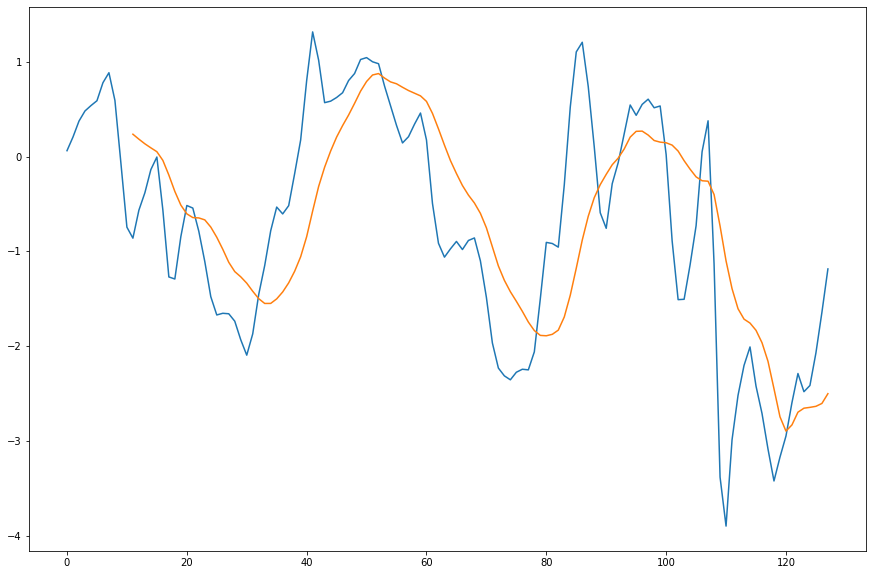

In [39]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[3759])
plt.plot(body_gyro_x_train.T[3759].rolling(window=12).mean())
plt.show()

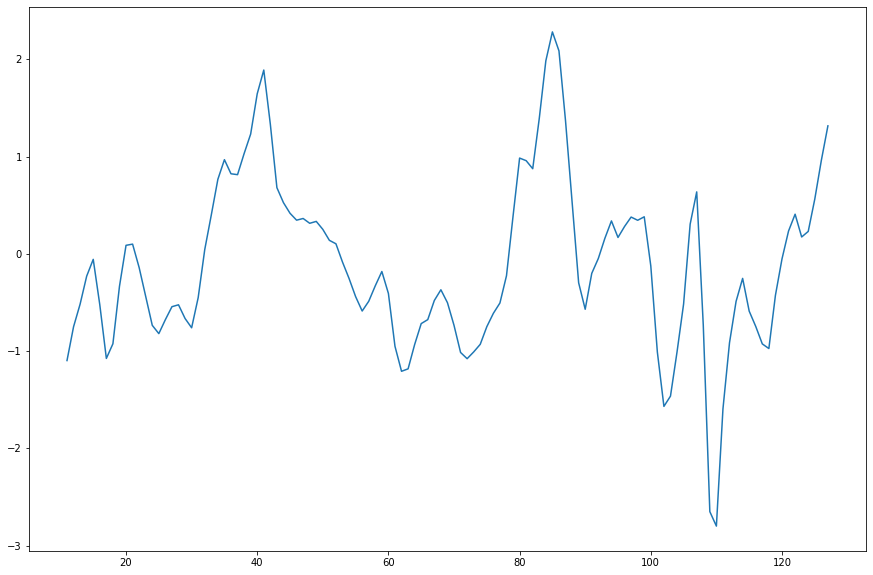

In [40]:
plt.figure(figsize=(15,10))
ts_shift = body_gyro_x_train.T[3759] - body_gyro_x_train.T[3759].rolling(window=12).mean()
plt.plot(ts_shift)
plt.show()

# Euclidean Distance

In [41]:
dist = euclidean(body_gyro_x_train.T[3759], body_gyro_x_train.T[3915])
dist

28.56716244114767

# Manhattan Distance

In [42]:
dist = cityblock(body_gyro_x_train.T[3759], body_gyro_x_train.T[3915])
dist

247.23993729799997

# Dynamic Time Warping

In [43]:
dist = dtw(body_gyro_x_train.T[3759], body_gyro_x_train.T[3915])
dist

19.61016070492962

# Features Extraction

In [34]:
import numpy as np
import scipy.stats as stats

In [35]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
   #     'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [46]:
features_1 = calculate_features(body_gyro_x_train.T[3759])
features_2 = calculate_features(body_gyro_x_train.T[3915])

In [47]:
features_1

{'avg': -0.72298030896875,
 'std': 1.2238932012579,
 'var': 1.4979145680853105,
 'med': -0.73769715,
 '10p': -2.3738511,
 '25p': -1.646354,
 '50p': -0.73769715,
 '75p': 0.391832275,
 '90p': 0.75462703,
 'iqr': 2.038186275,
 'cov': -0.5907217298255119,
 'skw': -0.37369816633335984,
 'kur': -0.7617695893462333}

In [48]:
features_2

{'avg': 0.452039421015625,
 'std': 1.2165751246447372,
 'var': 1.4800550339043577,
 'med': 0.29871464999999997,
 '10p': -0.81016383,
 '25p': -0.4287381,
 '50p': 0.29871464999999997,
 '75p': 1.0100852500000002,
 '90p': 1.9529339999999997,
 'iqr': 1.4388233500000003,
 'cov': 0.37156720687317113,
 'skw': 1.0674054522508158,
 'kur': 1.0812888697019991}

In [49]:
from tsfresh.feature_extraction import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

# Compression-based Distances

In [25]:
import zlib
import string

In [51]:
s = "Hello world!"
print(s)
print(s.encode('utf-8'))
zlib.compress(s.encode('utf-8'))

Hello world!
b'Hello world!'


b'x\x9c\xf3H\xcd\xc9\xc9W(\xcf/\xcaIQ\x04\x00\x1d\t\x04^'

In [52]:
def CDM(x, y):
    return len(zlib.compress(x + y)) / (len(zlib.compress(x)) + len(zlib.compress(y)))

In [53]:
ts1_str = (' '.join([str(v) for v in body_gyro_x_train.T[:10]])).encode('utf-8')
ts1_str

b'0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 

In [54]:
ts2_str = (' '.join([str(v) for v in total_acc_x_train.T[:10]])).encode('utf-8')
ts2_str

b'0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 

In [55]:
print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  71298
len(compress(ts1_str+ts2_str)):  32381
len(compress(ts1_str)):  16592
len(compress(ts2_str)):  16592
CDM =  0.9758015911282546


In [56]:
ts1_str = (' '.join([str(v) for v in body_gyro_x_train.T[3759]])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in total_acc_x_train.T[3937]])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  2517
len(compress(ts1_str+ts2_str)):  1147
len(compress(ts1_str)):  584
len(compress(ts2_str)):  558
CDM =  1.0043782837127846


# Time Series Approximation

In [57]:
from pyts.approximation import DiscreteFourierTransform

In [58]:
n_coefs = 16

dft = DiscreteFourierTransform(n_coefs=n_coefs)
ts_dft = dft.fit_transform(body_gyro_x_train.T[3759].values.reshape(1, -1))

In [59]:
ts_dft

array([[-92.54147955, -31.04903058, -23.16630661, -15.43291937,
          0.96489981,  37.65250352, -78.87927386,   7.28223229,
        -11.80392055,  -0.42017717,  -8.78239243,  19.86813299,
         -3.47966085,  -0.60485511,  -6.41368888,  -1.40274697]])

In [60]:
ts_dft.shape

(1, 16)

In [61]:
# code derived from https://pyts.readthedocs.io/en/stable/auto_examples/approximation/plot_dft.html
def dft_inverse_trasform(X_dft, n_coefs, n_timestamps):
    # Compute the inverse transformation
    n_samples = X_dft.shape[0]
    if n_coefs % 2 == 0:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                            np.zeros((n_samples, ))]
        ]
    else:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs + 1, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
        ]
    X_irfft = np.fft.irfft(X_dft_new, n_timestamps)
    return X_irfft

In [62]:
ts_dft_inv = dft_inverse_trasform(ts_dft, n_coefs=n_coefs, n_timestamps=len(body_gyro_x_train.T.values))
ts_dft_inv

array([[-0.47465   , -0.17641284,  0.07470701,  0.26994682,  0.40396993,
         0.47520252,  0.48587743,  0.44176828,  0.35162728,  0.22636985,
         0.07807735, -0.08108904, -0.23995742, -0.38928912, -0.52249931,
        -0.63607745, -0.72966121, -0.80575476, -0.86912182, -0.925921  ,
        -0.98268151, -1.04523761, -1.11774693, -1.2019106 , -1.2964916 ,
        -1.39719501, -1.49693268, -1.58645046, -1.65525365, -1.69273068,
        -1.68935026, -1.6377973 , -1.53391768, -1.3773625 , -1.17185502,
        -0.9250457 , -0.64796605, -0.35413707, -0.05842562,  0.22423052,
         0.4800949 ,  0.69776988,  0.86908379,  0.98964161,  1.05899103,
         1.08039839,  1.06027094,  1.00729866,  0.93141592,  0.84269898,
         0.75031698,  0.66164341,  0.58161286,  0.51237764,  0.45328467,
         0.40115793,  0.35084107,  0.29593021,  0.22961183,  0.1455154 ,
         0.03849463, -0.09473522, -0.25515781, -0.44124424, -0.64897627,
        -0.87208855, -1.10249574, -1.33085746, -1.5

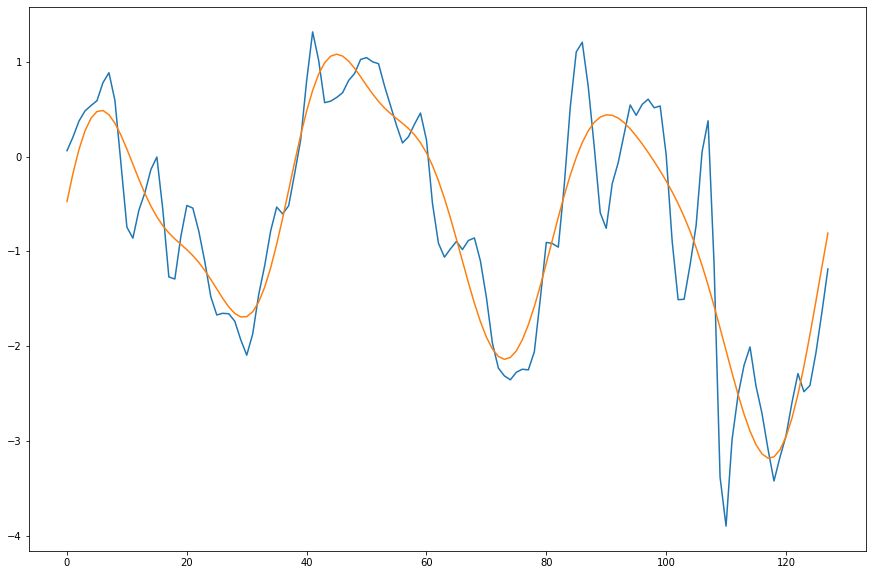

In [63]:
plt.figure(figsize=(15,10))
plt.plot(body_gyro_x_train.T[3759].ravel())
plt.plot(ts_dft_inv.ravel())
plt.show()

In [26]:
from sklearn.decomposition import TruncatedSVD

In [65]:
svd = TruncatedSVD(n_components=2)
ts_svd = svd.fit_transform(body_gyro_x_train.T[3759].values.reshape(1, -1))
#ts_svd = svd.fit_transform(np.array([ts.values.reshape(1, -1)[0], 
#                                     ts.values.reshape(1, -1)[0]]))

In [66]:
ts_svd

array([[16.08224898]])

In [67]:
ts_svd_inv = svd.inverse_transform(ts_svd)[0]
ts_svd_inv

array([ 0.06187077,  0.2061538 ,  0.374034  ,  0.4809799 ,  0.5377657 ,
        0.5891368 ,  0.7793035 ,  0.8847846 ,  0.5920532 , -0.07045474,
       -0.7453525 , -0.8610675 , -0.5658739 , -0.3818689 , -0.1371924 ,
       -0.00494672, -0.5634018 , -1.270293  , -1.292233  , -0.8457673 ,
       -0.5164648 , -0.5436463 , -0.7884613 , -1.108336  , -1.478867  ,
       -1.67165   , -1.654001  , -1.659001  , -1.737292  , -1.933324  ,
       -2.095822  , -1.871045  , -1.455387  , -1.149457  , -0.7830364 ,
       -0.5331336 , -0.6052999 , -0.5182591 , -0.1791989 ,  0.1751265 ,
        0.8003966 ,  1.315378  ,  1.017044  ,  0.5687653 ,  0.5844634 ,
        0.6231693 ,  0.6734945 ,  0.8021287 ,  0.8761522 ,  1.024218  ,
        1.044188  ,  1.000218  ,  0.9795744 ,  0.7440514 ,  0.5352288 ,
        0.3285819 ,  0.1436463 ,  0.2095649 ,  0.341353  ,  0.4593032 ,
        0.1751681 , -0.4944046 , -0.9148703 , -1.061569  , -0.9741507 ,
       -0.8957159 , -0.9811972 , -0.8856729 , -0.8589474 , -1.10

In [27]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

In [70]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(body_gyro_x_train.T[3759].values.reshape(1,-1))
#ts1 = scaler.fit_transform(body_acc_x_train.T[0].values.reshape(1,-1))
#ts2 = scaler.fit_transform(body_acc_x_train.T[0].values.reshape(1,-1))

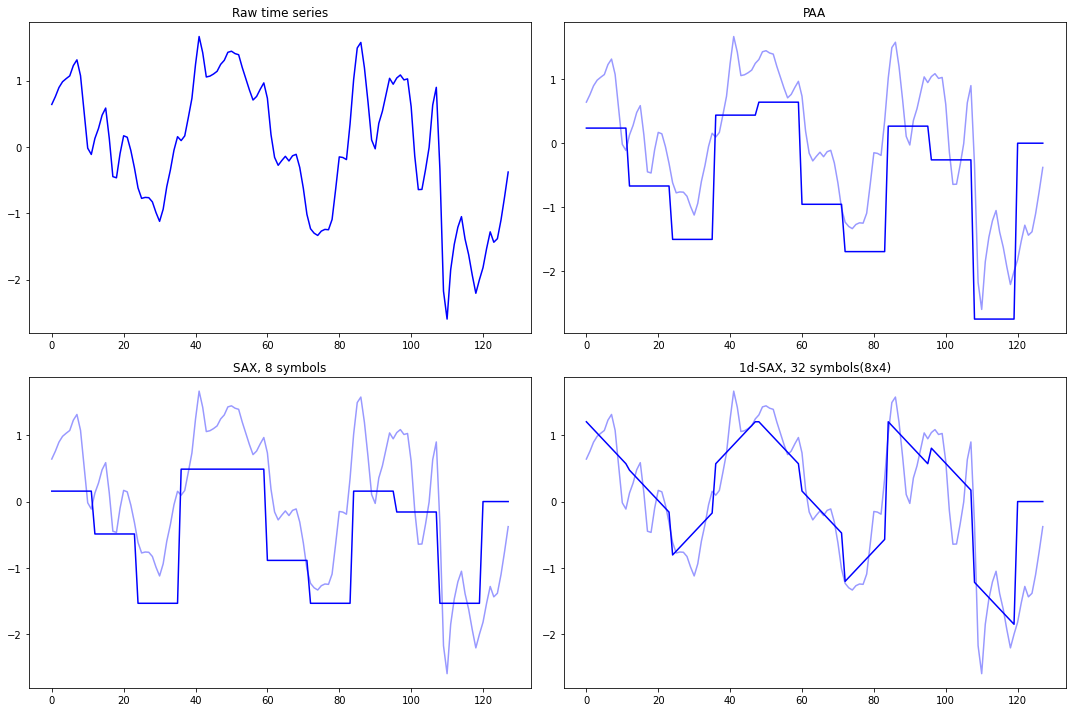

In [71]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(body_gyro_x_train.T[3759].values.reshape(1,-1))
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(body_gyro_x_train.T[3759].values.reshape(1,-1))
sax_dataset_inv = sax.inverse_transform(ts_sax)

# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 4
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts_sax1d = one_d_sax.fit_transform(ts)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(ts_sax1d)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(ts[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

# Clustering

# Preparazione delle classi

In [24]:
body_gyro_x_train = pd.read_csv('Inertial Signals/body_gyro_x_train.txt', delim_whitespace=True, header=None, encoding='latin-1')
#body_gyro_x_train['subject'] = pd.read_csv('subject_train.txt', header=None, squeeze=True)
y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
#train = body_gyro_x_train
body_gyro_x_train['Activity'] = y_train
body_gyro_x_train['ActivityName'] = y_train_labels

In [26]:
sitting_train = []
for i in range(len(body_gyro_x_train)):
    if body_gyro_x_train.iloc[i]['ActivityName'] == 'SITTING':
        sitting_train.append(i)

standing_train = []
for i in range(len(body_gyro_x_train)):
    if body_gyro_x_train.iloc[i]['ActivityName'] == 'STANDING':
        standing_train.append(i)
        
laying_train = []
for i in range(len(body_gyro_x_train)):
    if body_gyro_x_train.iloc[i]['ActivityName'] == 'LAYING':
        laying_train.append(i)

In [27]:
droptrian = sitting_train + standing_train + laying_train

In [28]:
body_gyro_x_train_sbilanciato = body_gyro_x_train.drop(droptrian)

In [29]:
body_gyro_x_train_sbilanciato = body_gyro_x_train_sbilanciato.drop(columns=['Activity'])

In [30]:
body_gyro_x_train_sbilanciato = body_gyro_x_train_sbilanciato.drop(columns=['ActivityName'])

## Shape-based Clustering

In [76]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks
from sklearn.metrics import silhouette_samples, silhouette_score

In [81]:
sse_list = []

for k in range(1, 31):
    kmeans = TimeSeriesKMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(body_gyro_x_train_sbilanciato)
    sse_list.append( kmeans.inertia_ )

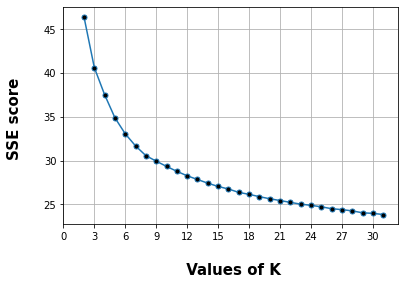

In [82]:
values = [0,3,6,9,12,15,18,21,24,27,30]
plt.rcParams['axes.facecolor'] = 'w'
plt.plot(range(2, len(sse_list)+2), sse_list, marker='.', markersize=10, markerfacecolor='black')
plt.ylabel('SSE score \n', fontsize = 15, fontweight = 'bold')
plt.xlabel('\n Values of K', fontsize = 15, fontweight = 'bold')
plt.xticks(values)
plt.grid(True)
plt.show()

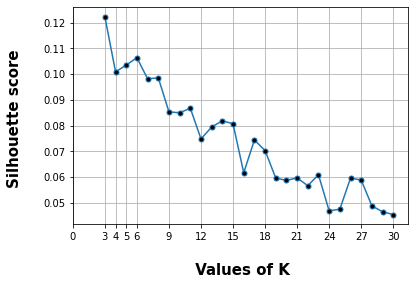

In [83]:
values = [0,3,4 ,5, 6,9,12,15,18,21,24,27,30]
plt.rcParams['axes.facecolor'] = 'w'
range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = TimeSeriesKMeans(n_clusters=num_clusters, metric='dtw')
    kmeans.fit(body_gyro_x_train_sbilanciato)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(body_gyro_x_train_sbilanciato, kmeans.labels_))
    
plt.plot(range_n_clusters,silhouette_avg, marker='.', markersize=10, markerfacecolor='black')
plt.xlabel('\n Values of K', fontsize = 15, fontweight = 'bold')
plt.ylabel('Silhouette score \n', fontsize = 15, fontweight = 'bold')
plt.xticks(values)
plt.grid(True)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

inertia_list = []
for num_clusters in range(1, 31):
    kmeans_model = TimeSeriesKMeans(n_clusters=num_clusters, metric="dtw", max_iter=100, random_state=0)
    kmeans_model.fit(body_gyro_x_train_sbilanciato)
    inertia_list.append(kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(1,31),inertia_list)
plt.scatter(range(1,31),inertia_list)
#plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

In [128]:
km_eu = TimeSeriesKMeans(n_clusters=6, metric="euclidean", max_iter=100, random_state=0)
km_eu.fit(body_gyro_x_train_sbilanciato)

TimeSeriesKMeans(max_iter=100, n_clusters=6, random_state=0)

In [ ]:
km_eu.cluster_centers_.shape

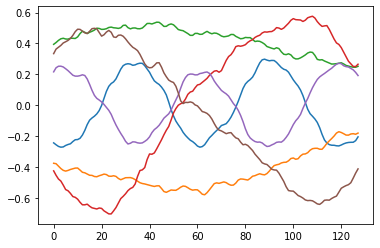

In [95]:
plt.plot(np.squeeze(km_eu.cluster_centers_).T)
plt.show()

In [129]:
np.unique(km_eu.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([786, 536, 561, 291, 788, 323]))

In [89]:
km_eu.inertia_

31.77053051774395

In [36]:
km_dtw = TimeSeriesKMeans(n_clusters=11, metric="dtw", max_iter=100, random_state=0)
km_dtw.fit(body_gyro_x_train_sbilanciato)

TimeSeriesKMeans(max_iter=100, metric='dtw', n_clusters=11, random_state=0)

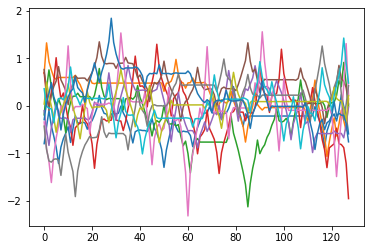

In [37]:
plt.plot(np.squeeze(km_dtw.cluster_centers_).T)
plt.show()

In [38]:
np.unique(km_dtw.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([389, 205, 181, 124, 550, 401,  76, 181, 597, 353, 228]))

In [39]:
km_dtw.inertia_

6.027390899325689

In [41]:
km_softdtw = TimeSeriesKMeans(n_clusters=11, metric="softdtw", max_iter=100, random_state=0)
km_softdtw.fit(body_gyro_x_train_sbilanciato)

TimeSeriesKMeans(max_iter=100, metric='softdtw', n_clusters=11, random_state=0)

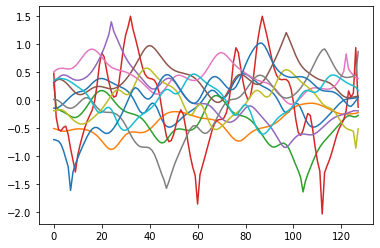

In [42]:
plt.plot(np.squeeze(km_softdtw.cluster_centers_).T)
plt.show()

In [43]:
km_softdtw.inertia_

34375.46397241325

In [44]:
np.unique(km_softdtw.labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([485, 340, 161, 121, 259, 252, 279, 212, 478, 496, 202]))

## Features-based Clustering

In [32]:
from sklearn.cluster import KMeans

In [156]:
s = body_gyro_x_train_sbilanciato
s = s.reset_index(drop=True)

In [159]:
s = s.T
F = []
for i in s:
    F.append(list(calculate_features(s[i]).values()))
np.shape(F)

(3285, 12)

In [160]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(F)
kmeans.labels_

array([3, 5, 0, ..., 1, 3, 1], dtype=int32)

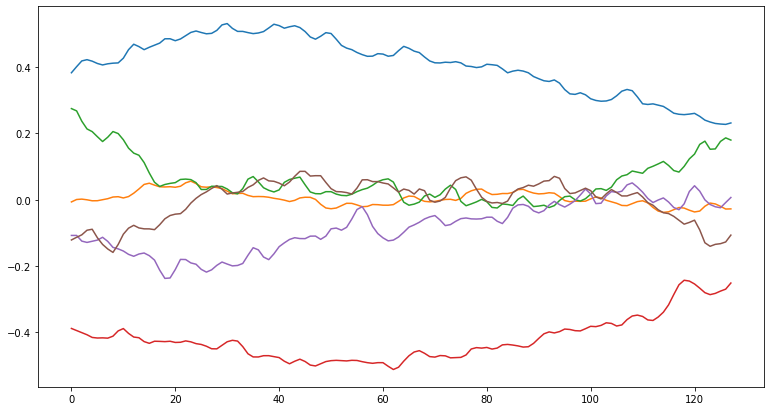

In [163]:
plt.figure(figsize=(13,7))
for i in range(6):
    plt.plot(np.mean(s[np.where(kmeans.labels_ == i)[0]].T), label=i)
plt.show()

In [164]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32),
 array([ 572, 1260,  197,  497,  491,  268]))

# Compression-based Clustering

In [28]:
from sklearn.metrics import pairwise_distances

In [29]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [ ]:
M = pairwise_distances(body_gyro_x_train_sbilanciato, metric=cdm_dist)

In [ ]:
M.shape

In [ ]:
plt.plot(sorted(M.ravel()))
plt.show()

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [ ]:
dbscan = DBSCAN(eps=0.965, min_samples=5, metric='precomputed')
dbscan.fit(M)

In [ ]:
dbscan.labels_

In [40]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2.5, 0.1)]
min_samples_to_test = range(5, 50, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4]
MIN_SAMPLES: [5, 10, 15, 20, 25, 30, 35, 40, 45]


In [41]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters+1))
        
    return(noise_mean_distance, number_of_clusters)

In [42]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [48]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, body_gyro_x_train_sbilanciato, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 4.538    1
  2 | Tested with eps = 0.1 and min_samples =  10 | 4.538    1
  3 | Tested with eps = 0.1 and min_samples =  15 | 4.538    1
  4 | Tested with eps = 0.1 and min_samples =  20 | 4.538    1
  5 | Tested with eps = 0.1 and min_samples =  25 | 4.538    1
  6 | Tested with eps = 0.1 and min_samples =  30 | 4.538    1
  7 | Tested with eps = 0.1 and min_samples =  35 | 4.538    1
  8 | Tested with eps = 0.1 and min_samples =  40 | 4.538    1
  9 | Tested with eps = 0.1 and min_samples =  45 | 4.538    1
 10 | Tested with eps = 0.2 and min_samples =   5 | 4.538    1
 11 | Tested with eps = 0.2 and min_samples =  10 | 4.538    1
 12 | Tested with eps = 0.2 and min_samples =  15 | 4.538    1
 13 | Tested with eps = 0.2 and min_samples =  20 | 4.538    1
 14 | Tested with eps = 0.2 and min_samples =  25

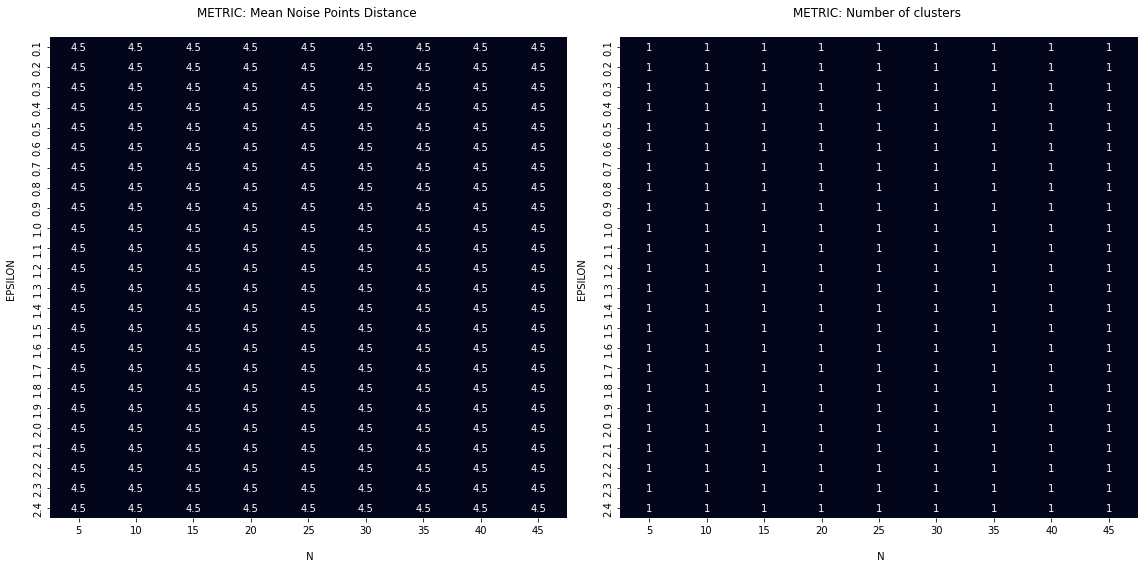

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance \n")
sns.heatmap(results_clusters+1, annot = True, cbar = False).set_title("METRIC: Number of clusters \n ")

ax1.set_xlabel("\n N"); ax2.set_xlabel("\n N")
ax1.set_ylabel("EPSILON \n"); ax2.set_ylabel("EPSILON \n")

plt.tight_layout(); plt.show()

# Approximated Clustering

In [221]:
n_paa_segments = 5
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(body_gyro_x_train_sbilanciato)

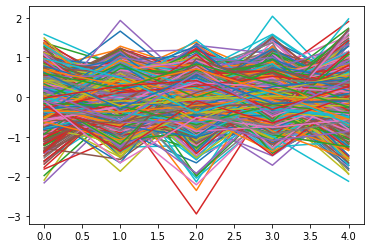

In [222]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

In [223]:
km = TimeSeriesKMeans(n_clusters=6, metric="euclidean", max_iter=100, random_state=0)
km.fit(X_paa)

TimeSeriesKMeans(max_iter=100, n_clusters=6, random_state=0)

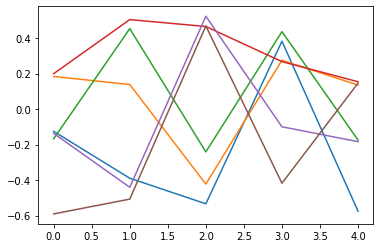

In [224]:
plt.plot(km.cluster_centers_.reshape(X_paa.shape[1], 6))
plt.show()

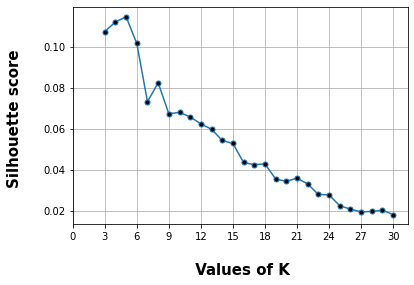

In [213]:
values = [0,3, 6,9,12,15,18,21,24,27,30]
plt.rcParams['axes.facecolor'] = 'w'
range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
silhouette_avg = []
for n_paa_segments in range_n_clusters:
    km = TimeSeriesKMeans(n_clusters=n_paa_segments, metric="euclidean", max_iter=100, random_state=0)
    km.fit(X_paa)
    cluster_labels = km.labels_
    silhouette_avg.append(silhouette_score(body_gyro_x_train_sbilanciato, km.labels_))
    
plt.plot(range_n_clusters,silhouette_avg, marker='.', markersize=10, markerfacecolor='black')
plt.xlabel('\n Values of K', fontsize = 15, fontweight = 'bold')
plt.ylabel('Silhouette score \n', fontsize = 15, fontweight = 'bold')
plt.xticks(values)
plt.grid(True)
plt.show()